In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
# for auto-reloading external modules
%load_ext autoreload
%autoreload 2

In [2]:
def display_images(images, rows, cols, size, title, subtitles):
    fig = plt.figure(figsize = size)
    c = 0
    sz = len(images)
    for i in range(rows):
        for j in range(cols):
            if sz == c:
                break
            ax1 = fig.add_subplot(rows, cols, c + 1)
            ax1.imshow(images[c], cmap = 'gray')
            ax1.set_title(subtitles[c], fontsize = 7)
            ax1.axis("off")
            c = c + 1
    plt.axis("off")
    plt.show()
    # Un comment the below line and comment the above line to save and display
    #plt.savefig('part2.png')

In [3]:
def convolve(im, k):
    # return signal.convolve2d(im, k, boundary='symm', mode='same')
    im = im.astype(np.float64)
    k = k.astype(np.float64)
    rows = im.shape[0]
    cols = im.shape[1]
    k_r = k.shape[0]
    k_c = k.shape[1]
    res = np.zeros(im.shape)
    for i in range(int(k_r/2), rows - int((k_r-1) / 2)):
        for j in range(int(k_c/2), cols - int((k_c - 1) / 2)):
            l_r = i - int(k_r / 2)
            r_r = i + int((k_r - 1) / 2)
            l_c = j - int(k_c / 2)
            r_c = j + int((k_c - 1) / 2)
            res[i][j] = max(0, sum(sum(k * im[l_r : r_r + 1, l_c : r_c + 1])))
    return res.astype(np.int)

In [4]:
def optical_flow(img1, img2, threshold):
    kernelx = np.array([[-1., 1.], [-1., 1.]])
    kernely = np.array([[-1., -1.], [1., 1.]])
    kernelt = np.array([[1., 1.], [1., 1.]])
    outputx = convolve(img1, kernelx)
    outputy = convolve(img1, kernely)
    outputt = convolve(img2, kernelt) - convolve(img1, kernelt)
    window_size = 15
    u = np.zeros(img1.shape)
    v = np.zeros(img1.shape)
    for i in range(int(window_size / 2), img1.shape[0] - int(window_size / 2)):
        for j in range(int(window_size / 2), img1.shape[1] - int(window_size / 2)):
            Ix = outputx[i - int(window_size / 2) : i + int(window_size / 2) + 1, j - int(window_size / 2) : j + int(window_size / 2) + 1].flatten()
            Iy = outputy[i - int(window_size / 2) : i + int(window_size / 2) + 1, j - int(window_size / 2) : j + int(window_size / 2) + 1].flatten()
            It = outputt[i - int(window_size / 2) : i + int(window_size / 2) + 1, j - int(window_size / 2) : j + int(window_size / 2) + 1].flatten()
            A = np.array([[np.sum(Ix * Ix), np.sum(Ix * Iy)], [np.sum(Ix * Iy), np.sum(Iy * Iy)]])
            b = np.array([-np.sum(It * Ix), -np.sum(It * Iy)])
            res = np.linalg.pinv(A).dot(b)
            u[i,j] = res[0]
            v[i,j] = res[1]
    magnitude = np.zeros(img1.shape)
    angle = np.zeros(img1.shape)
    mask = np.zeros(img1.shape)
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            magnitude[i, j] = u[i, j] * u[i, j] + v[i, j] * v[i, j]
            angle[i, j] = np.arctan2(v[i, j],u[i, j])
            if magnitude[i, j] >= threshold:
                mask[i, j] = 255
    return outputx, outputy, outputt, u, v, magnitude, angle, mask, \
    'Sobel X', 'Sobel Y', 'Derivative in t', 'Optical Flow in X direction', 'Optical Flow in Y Direction', \
    'Norm', 'Angle', 'Optical Flow Mask'


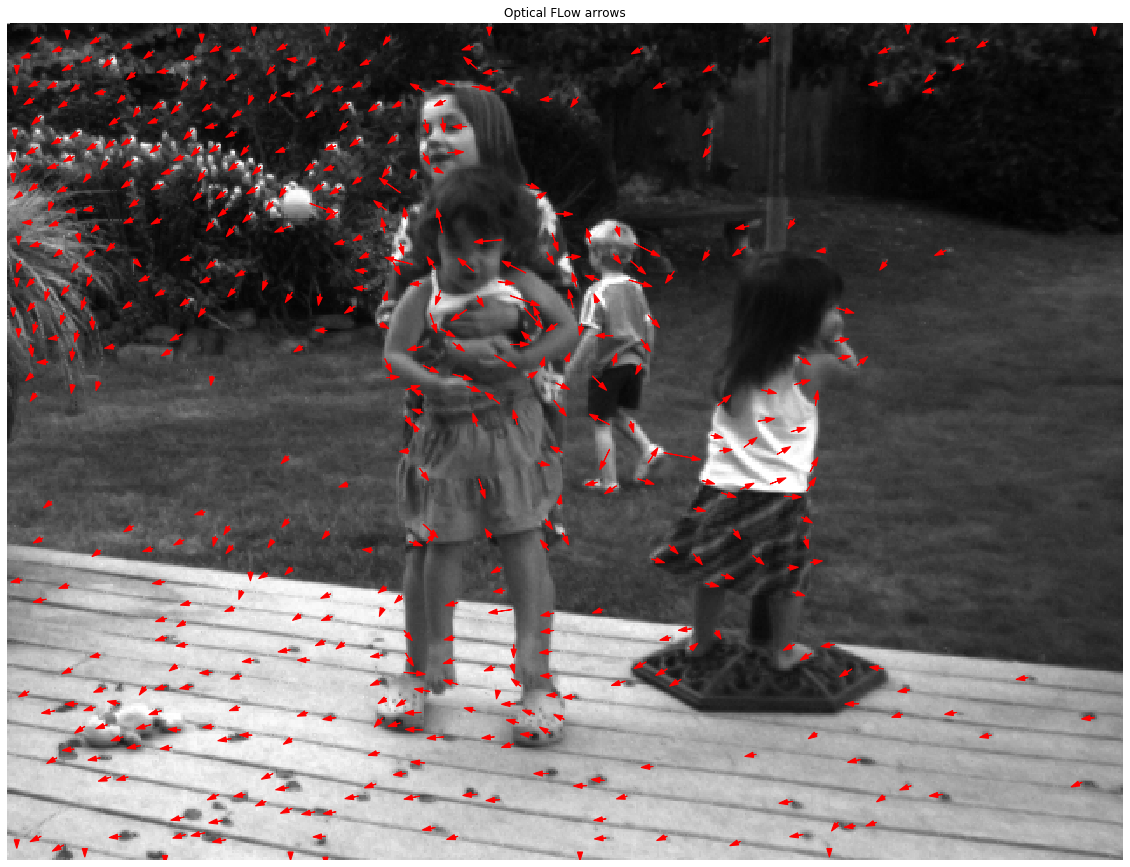

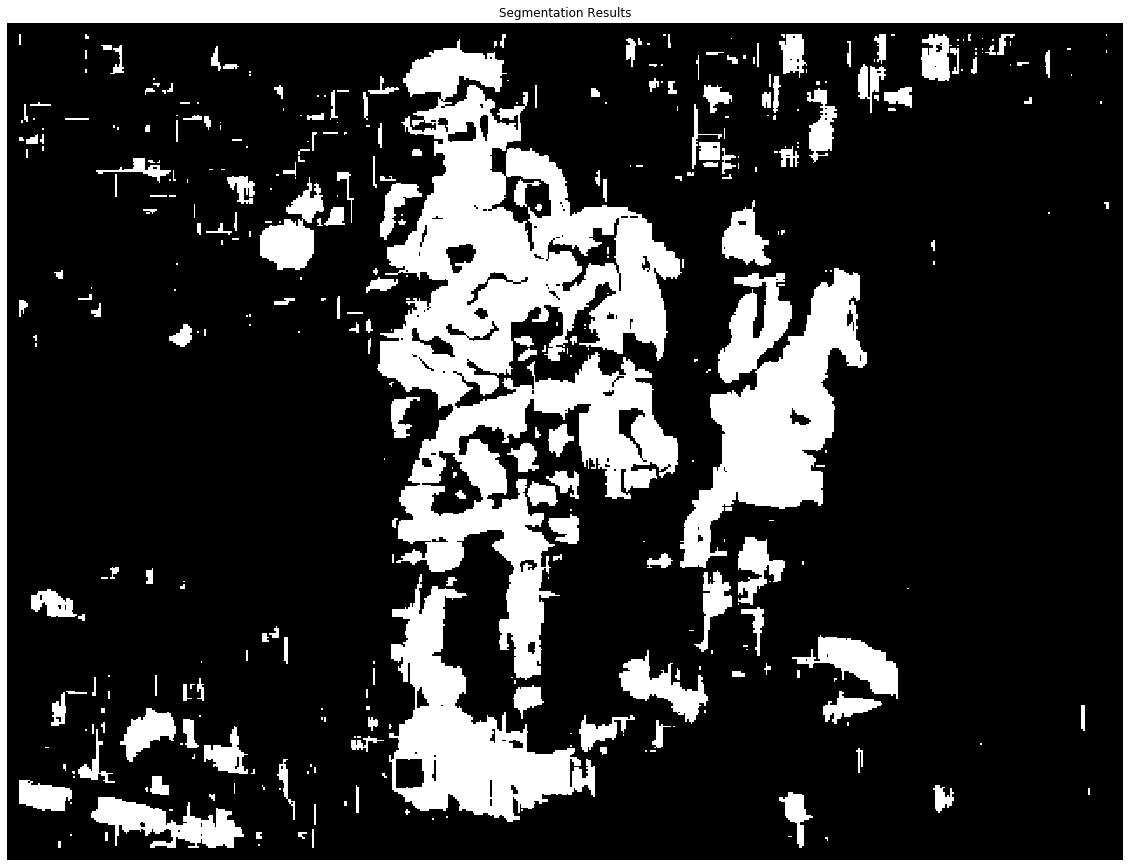

In [6]:
img1 = cv2.imread('../input_data/Backyard/frame10.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/Backyard/frame11.png', cv2.IMREAD_GRAYSCALE)
outputx, outputy, outputt, u, v, magnitude, angle, mask, label1, label2, label3, label4, label5, label6, \
label7, label8 = optical_flow(img1, img2, 8)


fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(img1, cmap = 'gray')
kp = cv2.goodFeaturesToTrack(img1, 1000, 0.01, 10, 3)
for arrow_ind in kp:
    x,y = arrow_ind[0]
    y = int(y)
    x = int(x)
    ax1.arrow(x,y,u[y,x],v[y,x],head_width = 3, head_length = 5, color = (1,0,0))
plt.axis("off")
plt.title("Optical FLow arrows")
plt.show()
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(mask, cmap = 'gray')
plt.axis("off")
plt.title("Segmentation Results")
plt.show()

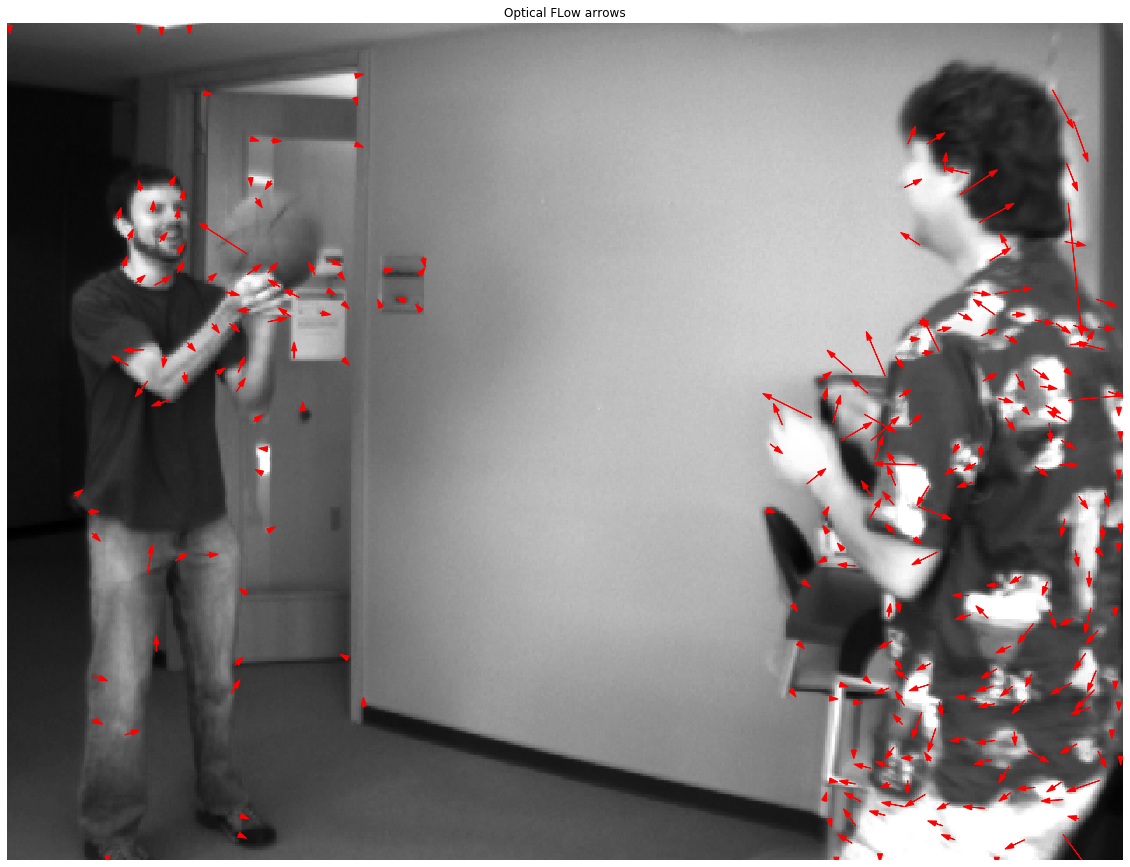

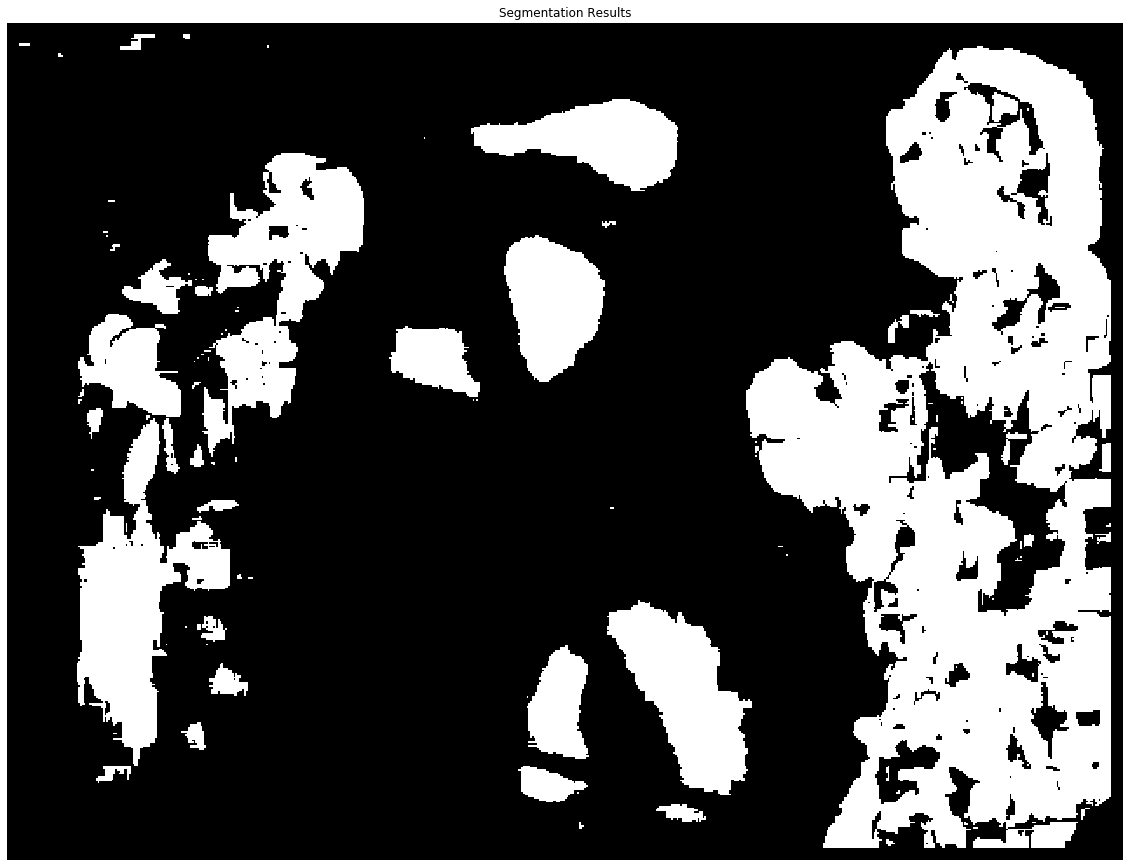

In [7]:
img1 = cv2.imread('../input_data/Basketball/frame10.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/Basketball/frame11.png', cv2.IMREAD_GRAYSCALE)
outputx, outputy, outputt, u, v, magnitude, angle, mask, label1, label2, label3, label4, label5, label6, \
label7, label8 = optical_flow(img1, img2, 10)


fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(img1, cmap = 'gray')
kp = cv2.goodFeaturesToTrack(img1, 1000, 0.01, 10, 3)
for arrow_ind in kp:
    x,y = arrow_ind[0]
    y = int(y)
    x = int(x)
    ax1.arrow(x,y,u[y,x],v[y,x],head_width = 3, head_length = 5, color = (1,0,0))
plt.axis("off")
plt.title("Optical FLow arrows")
plt.show()
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(mask, cmap = 'gray')
plt.axis("off")
plt.title("Segmentation Results")
plt.show()

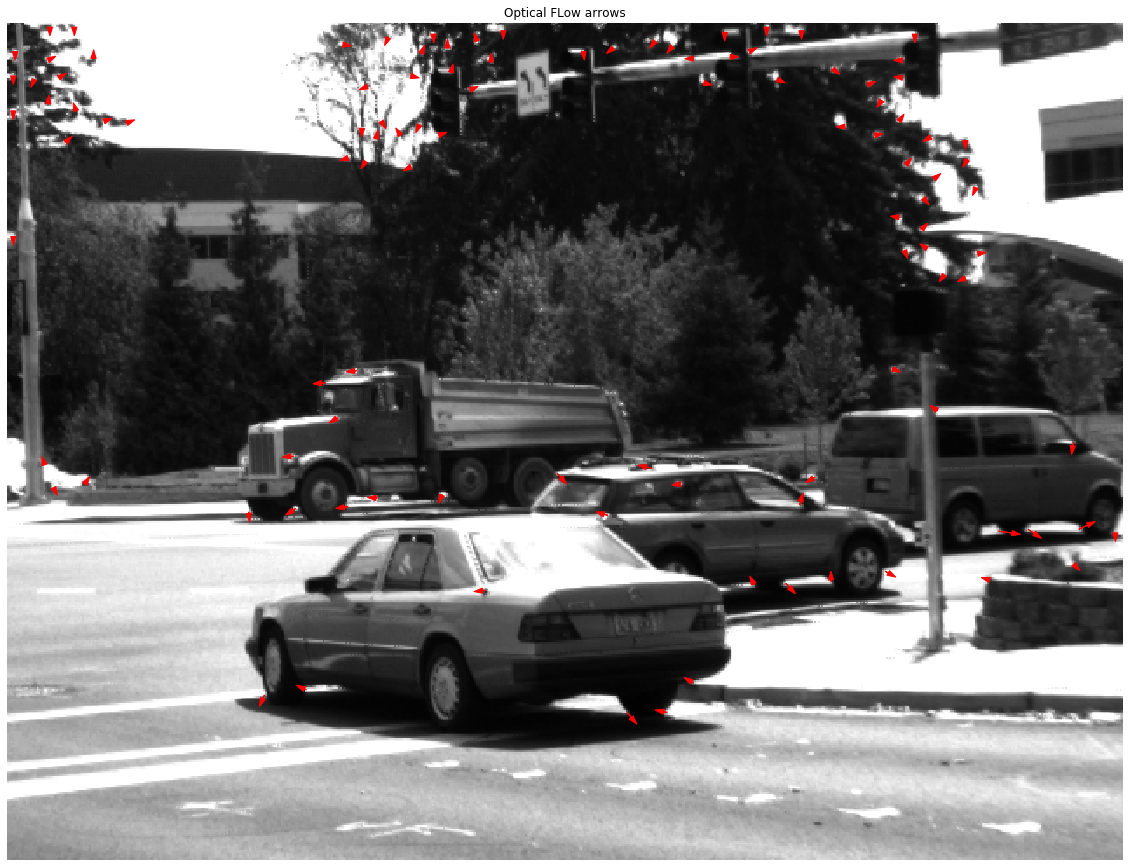

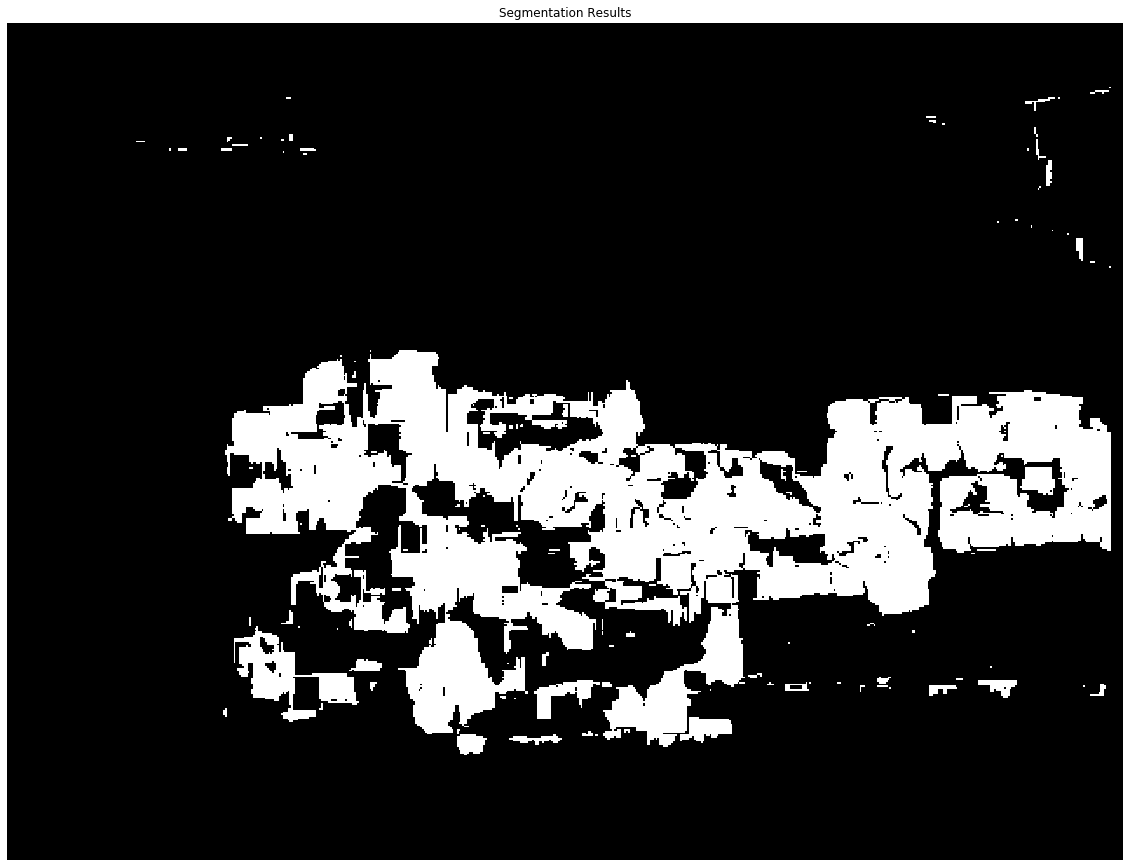

In [8]:
img1 = cv2.imread('../input_data/Dumptruck/frame10.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/Dumptruck/frame11.png', cv2.IMREAD_GRAYSCALE)
outputx, outputy, outputt, u, v, magnitude, angle, mask, label1, label2, label3, label4, label5, label6, \
label7, label8 = optical_flow(img1, img2, 2)


fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(img1, cmap = 'gray')
kp = cv2.goodFeaturesToTrack(img1, 1000, 0.3, 10, 3)
for arrow_ind in kp:
    x,y = arrow_ind[0]
    y = int(y)
    x = int(x)
    ax1.arrow(x,y,u[y,x],v[y,x],head_width = 3, head_length = 5, color = (1,0,0))
plt.axis("off")
plt.title("Optical FLow arrows")
plt.show()
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(mask, cmap = 'gray')
plt.axis("off")
plt.title("Segmentation Results")
plt.show()

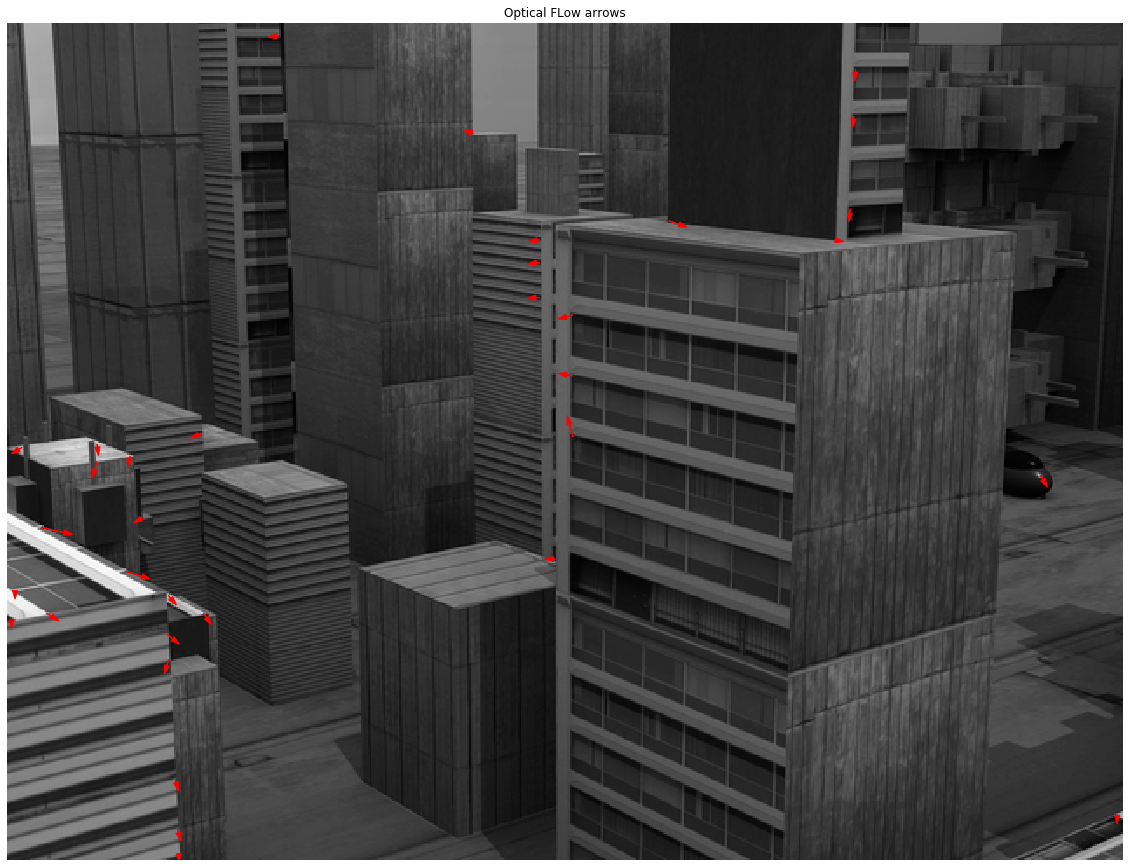

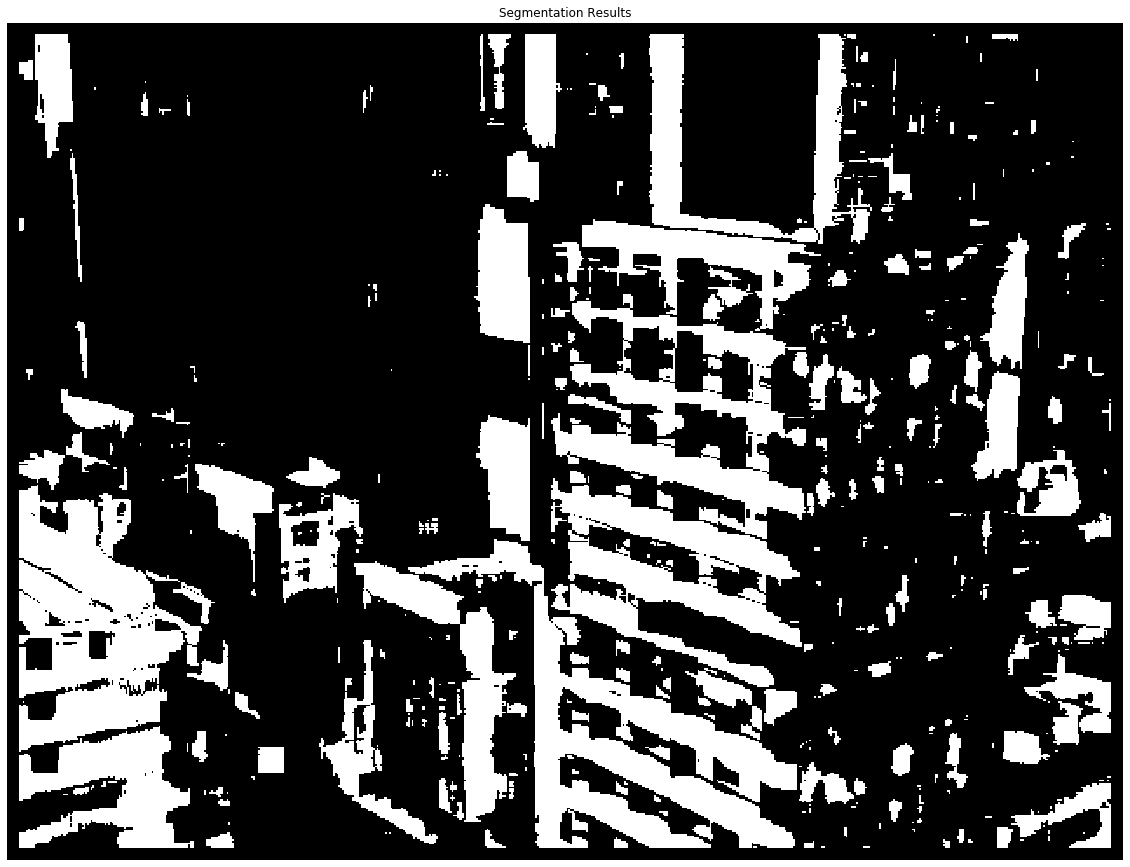

In [10]:
img1 = cv2.imread('../input_data/Urban/frame10.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/Urban/frame11.png', cv2.IMREAD_GRAYSCALE)
outputx, outputy, outputt, u, v, magnitude, angle, mask, label1, label2, label3, label4, label5, label6, \
label7, label8 = optical_flow(img1, img2, 10)


fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(img1, cmap = 'gray')
kp = cv2.goodFeaturesToTrack(img1, 1000, 0.3, 10, 3)
for arrow_ind in kp:
    x,y = arrow_ind[0]
    y = int(y)
    x = int(x)
    ax1.arrow(x,y,u[y,x],v[y,x],head_width = 3, head_length = 5, color = (1,0,0))
plt.axis("off")
plt.title("Optical FLow arrows")
plt.show()
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(mask, cmap = 'gray')
plt.axis("off")
plt.title("Segmentation Results")
plt.show()

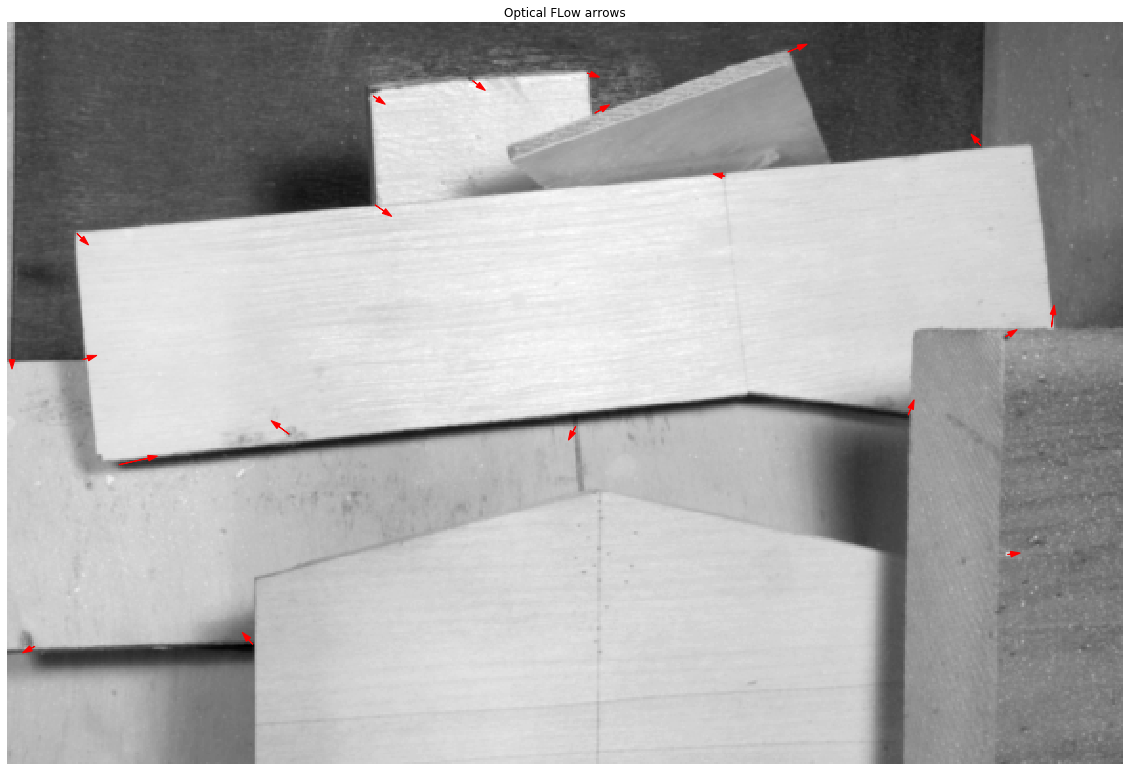

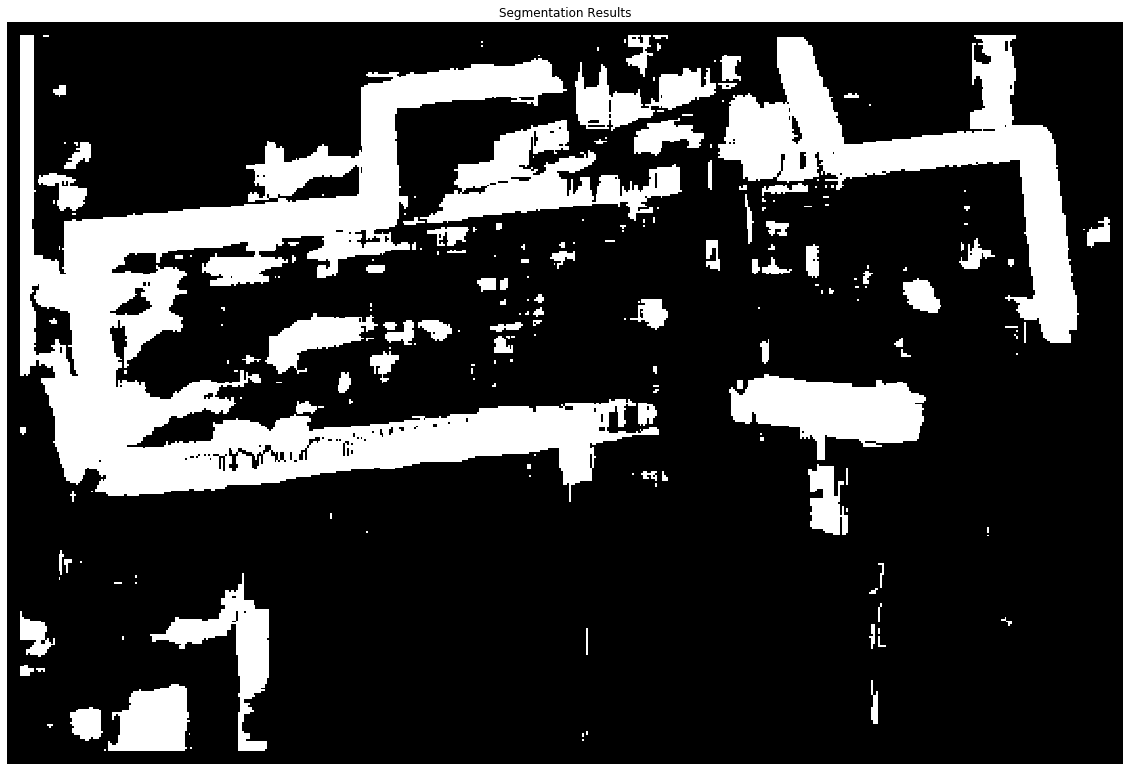

In [15]:
img1 = cv2.imread('../input_data/Wooden/frame10.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('../input_data/Wooden/frame11.png', cv2.IMREAD_GRAYSCALE)
outputx, outputy, outputt, u, v, magnitude, angle, mask, label1, label2, label3, label4, label5, label6, \
label7, label8 = optical_flow(img1, img2, 5)


fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(img1, cmap = 'gray')
kp = cv2.goodFeaturesToTrack(img1, 1000, 0.3, 10, 3)
for arrow_ind in kp:
    x,y = arrow_ind[0]
    y = int(y)
    x = int(x)
    ax1.arrow(x,y,u[y,x],v[y,x],head_width = 3, head_length = 5, color = (1,0,0))
plt.axis("off")
plt.title("Optical FLow arrows")
plt.show()
fig = plt.figure(figsize = (20, 20))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(mask, cmap = 'gray')
plt.axis("off")
plt.title("Segmentation Results")
plt.show()